In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Layer
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [51]:
class layer_polinomio(Layer):
  def __init__(self, num_outputs):
    self.num_outputs = num_outputs
    super(layer_polinomio, self).__init__()
    '''
    add_weight    - grega un parámetro entrenable
    'a_x'         - nombre del parámetro
    shape(1, 1)   - matriz de 1x1 (escalar)
    '''
    # self.a_0 = self.add_weight('a_0', shape = (1, 1))
    # self.a_1 = self.add_weight('a_1', shape = (1, 1))
    # self.a_2 = self.add_weight('a_2', shape = (1, 1))
    # self.a_3 = self.add_weight('a_3', shape = (1, 1))
    self.kernel = self.add_weight(
        'kernel',
        shape = [self.num_outputs]
    )

  def call(self, inputs):
    inputs = tf.convert_to_tensor(inputs)
    if (inputs.shape == ()):
      inputs = (inputs, )
    elif (len(inputs.shape)) == 1:
      inputs = tf.expand_dims(inputs, axis = 1)
    batch = tf.shape(inputs)[0]
    polinomio = self.kernel[0] + self.kernel[1] * tf.pow(inputs, 1) + self.kernel[2] * tf.pow(inputs, 2) + self.kernel[3] * tf.pow(inputs, 3)
    return polinomio

In [52]:
# from keras.src.engine.sequential import training
loss_tracker = keras.metrics.Mean(name = 'loss')
class funcion(Sequential):
  @property
  def metrics(self):
    return [loss_tracker]

  def train_step(self, data):
    batch_size = 100
    _x = tf.random.uniform((batch_size, 1), minval = -1, maxval = 1)
    f = tf.math.cos(2. * _x)

    with tf.GradientTape() as tape:
      y_pred = self(_x, training = True)
      loss = tf.math.reduce_mean(tf.math.square(y_pred - f))

    grads = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    loss_tracker.update_state(loss)

    return {'loss': loss_tracker.result()}


In [53]:
model = funcion() # Usando el modelo creado
model.add(layer_polinomio(4)) # Usando la capa creada

# model.add(Dense(500, activation = 'tanh', input_shape = (1, )))
model.add(Dense(300, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(1))

# model.summary()

In [54]:
model.compile(optimizer = Adam(), metrics = ['loss'])
x = tf.linspace(-1, 1, 100)
history = model.fit(x, epochs = 600, verbose = 0)

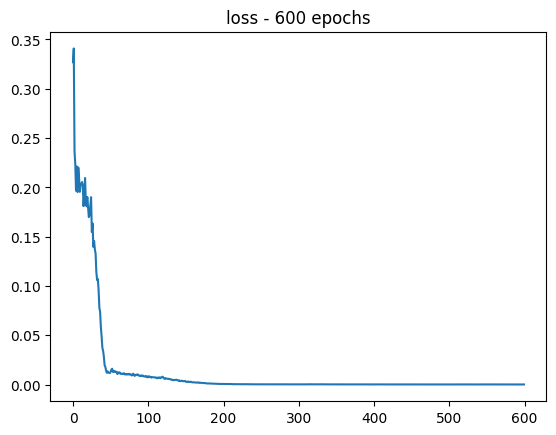

In [55]:
plt.plot(history.history["loss"])
# print(history.history['loss'])
# print(len(history.history['loss']))
plt.title(f'loss - {len(history.history["loss"])} epochs')
plt.savefig(f'loss - {len(history.history["loss"])} epochs')

4/4 [==============================] - 0s 2ms/step


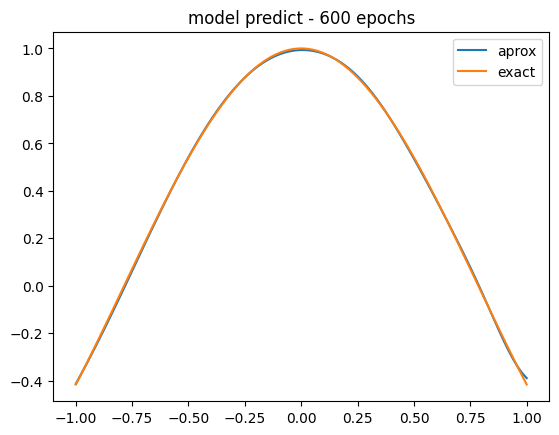

In [56]:
a = model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, tf.math.cos(2. * x), label="exact")
plt.title(f'model predict - {len(history.history["loss"])} epochs')
plt.legend()
plt.savefig(f'model predict - {len(history.history["loss"])} epochs')
plt.show()